# Árboles de decisión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfData = pd.read_csv("train_reduced.csv")

In [3]:
dfData['malo']=dfData['Credit_Score'].map({'Good':0, 'Standard':0, 'Poor':1})

In [4]:
dfData = dfData.loc[(dfData['Num_Bank_Accounts']>=0)&(dfData['Num_Bank_Accounts']<=10),:]
dfData['NumCuentas'] = dfData['Num_Bank_Accounts']
dfData.loc[dfData['NumCuentas']>=8,'NumCuentas'] = 8

In [5]:
dfData['Edad'] = dfData['Age'].str.replace('_','')
dfData['Edad'] = pd.to_numeric(dfData['Edad'],errors='coerce')
dfData = dfData.loc[(dfData['Edad']<=90)&(dfData['Edad']>=18),:]

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
df_train, df_test = train_test_split(dfData, test_size = 0.25, random_state=1973)

In [8]:
X = df_train[['NumCuentas','Edad']]
y = df_train['malo']

In [9]:
np.mean(y)

np.float64(0.28144450607013005)

In [10]:
Xtest = df_test[['NumCuentas','Edad']]
ytest = df_test['malo']

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier(min_samples_leaf=200)
clf = clf.fit(X,y)

In [13]:
y_train_pred = clf.predict(X)

In [81]:
np.unique(y_train_pred)

array([0, 1])

In [14]:
np.mean(y_train_pred)

np.float64(0.08085289948850681)

In [16]:
y_train_prob = clf.predict_proba(X)
y_train_prob[:,1]

array([0.39525692, 0.51836735, 0.25555556, ..., 0.35740072, 0.08238636,
       0.18442623])

In [17]:
from sklearn import tree

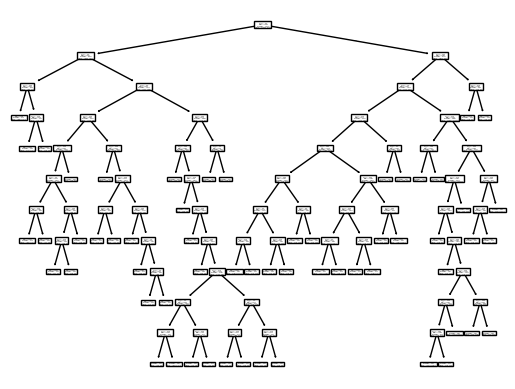

In [18]:
tree.plot_tree(clf)
plt.show()

In [19]:
from sklearn.metrics import roc_curve, auc

In [20]:
y_test_prob = clf.predict_proba(Xtest)

In [21]:
y_test_prob

array([[0.92444444, 0.07555556],
       [0.88288288, 0.11711712],
       [0.92270531, 0.07729469],
       ...,
       [0.80835381, 0.19164619],
       [0.74444444, 0.25555556],
       [0.92444444, 0.07555556]])

In [22]:
fpr, tpr, thresholds = roc_curve(ytest, y_test_prob[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.7057564613623123)

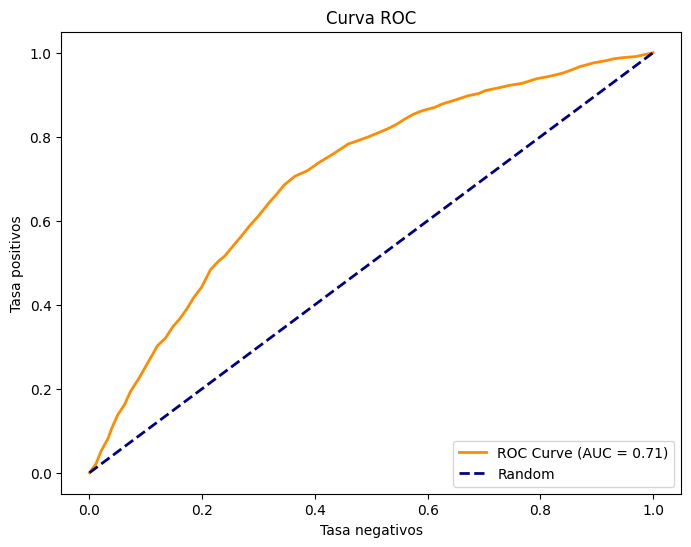

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('Tasa negativos')
plt.ylabel('Tasa positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Validación cruzada

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
CV = 5

scoring = "accuracy"

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring=scoring, cv=CV)

In [33]:
CV = 5

scoring = "accuracy"

scores = cross_val_score(pipe, X, y, scoring=scoring, cv=CV)
print(f"{scoring}: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Pipeline] ............ (step 1 of 2) Processing scalar, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scalar, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scalar, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scalar, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scalar, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
accuracy: 0.72 (+/- 0.01)


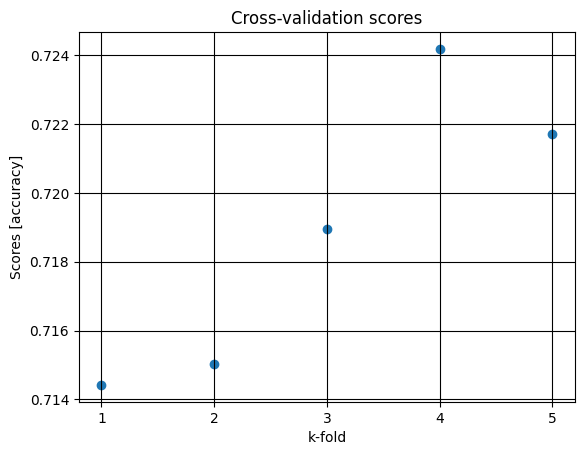

In [52]:
import matplotlib.pyplot as plt
import numpy as np


folds = np.arange(1, CV + 1)

plt.rc('grid', linestyle="-", color='black')
plt.scatter(x=folds, y=scores)
plt.xticks(folds)

plt.grid(True)

plt.title(f"Cross-validation scores")

plt.xlabel("k-fold")
plt.ylabel(f"Scores [{scoring}]")

plt.show()

In [53]:
scores

array([0.71441774, 0.71503389, 0.71895223, 0.72419106, 0.72172573])

In [90]:
from sklearn.svm import SVC

In [104]:
clf_svc = SVC(kernel="linear", C = 2,probability=True)
clf_svc = clf_svc.fit(X,y)

In [105]:
y_test_prob = clf_svc.predict_proba(Xtest)
y_test_prob[:,1]

array([0.28237776, 0.28237751, 0.28237801, ..., 0.282377  , 0.28237801,
       0.28237851])

In [106]:
fpr, tpr, thresholds = roc_curve(ytest, y_test_prob[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.49867886054712635)

In [100]:
X

,NumCuentas,Edad
17421,7,26
17278,5,23
3080,3,21
104,6,39
8430,3,25
...,...,...
13273,2,56
23918,7,45
6039,0,20
941,7,33


In [108]:
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

In [113]:
clf_svc = SVC(probability=True)
clf_svc = clf_svc.fit(X_std,y)

In [114]:
y_test_prob = clf_svc.predict_proba(scaler.transform(Xtest))
y_test_prob[:,1]

array([0.27839835, 0.27954879, 0.27877103, ..., 0.27832971, 0.27927329,
       0.28043384])

In [115]:
fpr, tpr, thresholds = roc_curve(ytest, y_test_prob[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.5844288110033364)